Exam by Álvaro Martínez Petit

### Question 1

###### Load the files GDP.csv and HDI.csv using read.csv()

In [29]:
#?read.csv()

gdp <- read.csv("GDP.csv", sep=",")
hdi <- read.csv("HDI.csv", sep=",")


### Question 2

###### Analyze the file that you have just loaded with head() and str()

In [30]:
head(gdp)
str(gdp)

head(hdi)
str(hdi)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


### Question 3

###### Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 

In [31]:
ordered_gdp <- gdp[order(gdp$Province), ]
ordered_hdi <- hdi[order(hdi$Province), ]

head(ordered_gdp)
head(ordered_hdi)

data <- cbind(ordered_gdp, ordered_hdi)

head(data)

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
48,Álava,36.055,País Vasco Navarra y Rioja
26,Albacete,17.864,Castilla-La Mancha
34,Alicante,19.201,Comunitat Valenciana y Murcia
1,Almería,20.873,Andalucía y Extremadura
12,Asturias,21.634,Asturias y Cantabria
16,Ávila,18.382,Castilla y León


,Province,HDI
,<chr>,<dbl>
49,Álava,0.990
14,Albacete,0.933
11,Alicante,0.930
2,Almería,0.915
29,Asturias,0.956
27,Ávila,0.952


,Province,GDP.per.capita,CCAA,Province,HDI
,<chr>,<dbl>,<chr>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,Albacete,17.864,Castilla-La Mancha,Albacete,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,Almería,20.873,Andalucía y Extremadura,Almería,0.915
12,Asturias,21.634,Asturias y Cantabria,Asturias,0.956
16,Ávila,18.382,Castilla y León,Ávila,0.952


### Question 4

###### The new data frame will contain two columns names "Province". remove one of the columns

In [32]:
filtered_data <- subset(data, select=-c(Province))

### Question 5

###### Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province GDP.per.capita, CCAA and HDI. With each province matching its CCAA. (Fig, 1)

In [33]:
head(filtered_data)

tail(filtered_data)

,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
48,36.055,País Vasco Navarra y Rioja,Álava,0.990
26,17.864,Castilla-La Mancha,Albacete,0.933
34,19.201,Comunitat Valenciana y Murcia,Alicante,0.930
1,20.873,Andalucía y Extremadura,Almería,0.915
12,21.634,Asturias y Cantabria,Asturias,0.956
16,18.382,Castilla y León,Ávila,0.952


,GDP.per.capita,CCAA,Province,HDI
,<dbl>,<chr>,<chr>,<dbl>
29,19.251,Castilla-La Mancha,Toledo,0.933
36,22.538,Comunitat Valenciana y Murcia,Valencia,0.946
24,23.947,Castilla y León,Valladolid,0.978
50,27.705,País Vasco Navarra y Rioja,Vizcaya,0.988
25,17.952,Castilla y León,Zamora,0.959
11,26.082,Aragon,Zaragoza,0.968


### Question 6

###### Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).

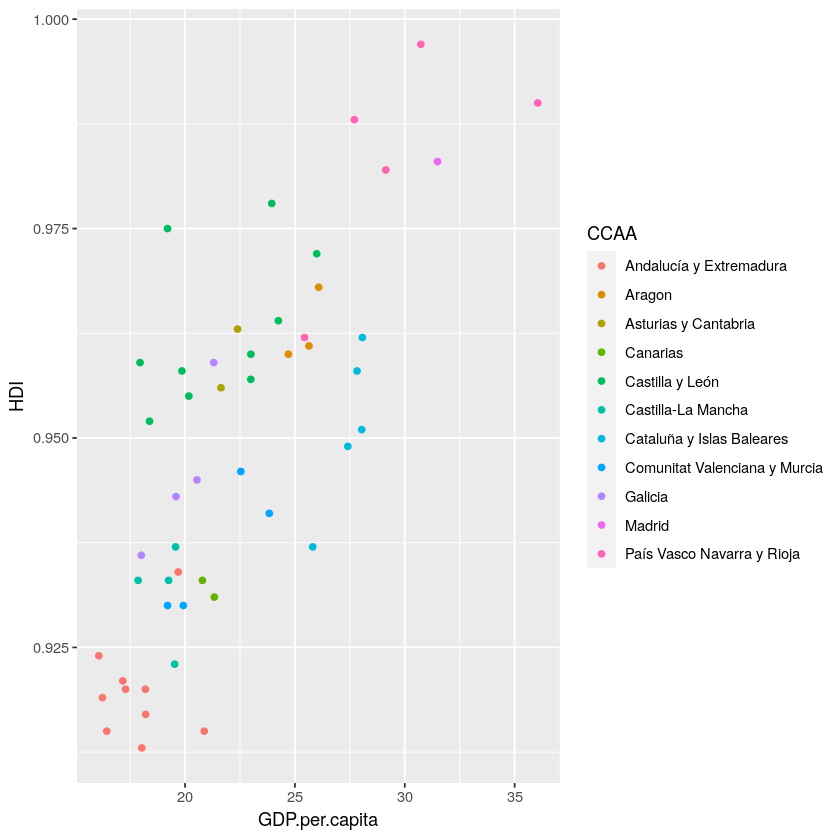

In [34]:
library(ggplot2)

ggplot(filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

### Question 7

###### Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)

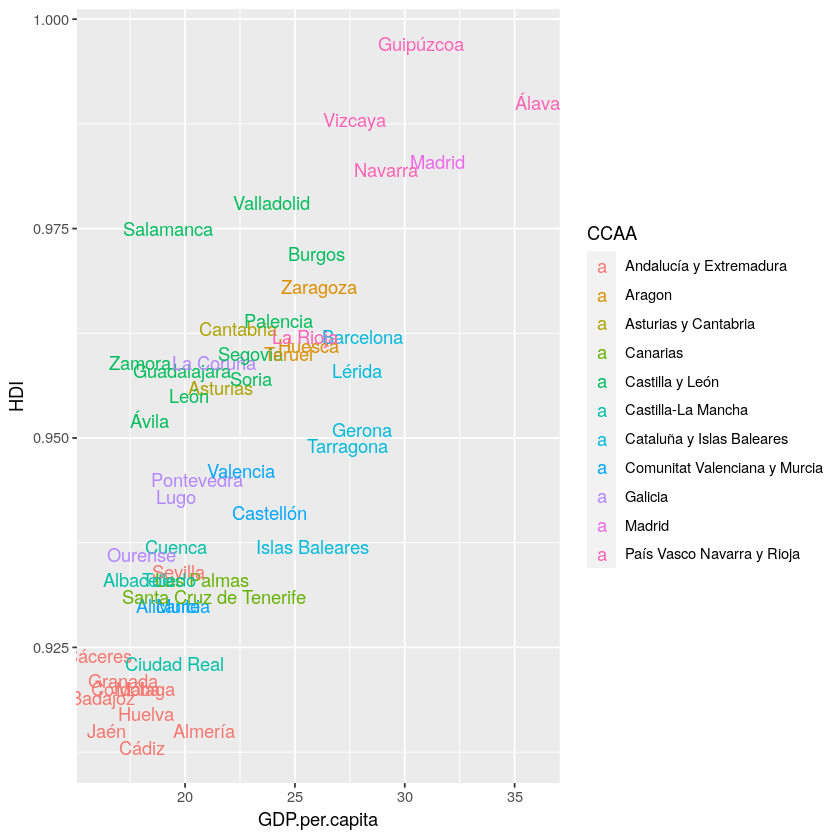

In [35]:
ggplot(filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA, check_overlap=T)) + geom_text(aes(label = Province))

### Question 8

###### Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().

In [36]:
gdp_mean <- aggregate(x = filtered_data$GDP.per.capita, by = list(filtered_data$CCAA), FUN = mean)
gdp_std <- aggregate(x = filtered_data$GDP.per.capita, by = list(filtered_data$CCAA), FUN = sd)
hdi_mean <- aggregate(x = filtered_data$HDI, by = list(filtered_data$CCAA), FUN = mean)
hdi_std <- aggregate(x = filtered_data$HDI, by = list(filtered_data$CCAA), FUN = sd)

gdp_mean
hdi_std

Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,17.81970
Aragon,25.47433
Asturias y Cantabria,22.01200
Canarias,21.06150
Castilla y León,21.57390
Castilla-La Mancha,19.05250
Cataluña y Islas Baleares,27.43120
Comunitat Valenciana y Murcia,21.37275
Galicia,19.86075


Group.1,x
<chr>,<dbl>
Andalucía y Extremadura,0.005977736
Aragon,0.004358899
Asturias y Cantabria,0.004949747
Canarias,0.001414214
Castilla y León,0.008956686
Castilla-La Mancha,0.005972158
Cataluña y Islas Baleares,0.009607289
Comunitat Valenciana y Murcia,0.008057088
Galicia,0.009639329


### Question 9

###### Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI

In [37]:
# Make sure everything is in order
ord_gdp_mean <- gdp_mean[order(gdp_mean$Group.1), ]
ord_gdp_std <- gdp_std[order(gdp_std$Group.1), ]
ord_hdi_mean <- hdi_mean[order(hdi_mean$Group.1), ]
ord_hdi_std <- hdi_std[order(hdi_std$Group.1), ]


ccaa_df <- data.frame(CCAA = c(ord_gdp_mean$Group.1), GDP.mean = c(ord_gdp_mean$x), GDP.stdev = c(ord_gdp_std$x),
                     HDI.mean = c(ord_hdi_mean$x), HDI.stdev = c(ord_hdi_std$x))

ccaa_df

CCAA,GDP.mean,GDP.stdev,HDI.mean,HDI.stdev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,1.5391112,0.91980,0.005977736
Aragon,25.47433,0.7045824,0.96300,0.004358899
Asturias y Cantabria,22.01200,0.5345727,0.95950,0.004949747
Canarias,21.06150,0.3839590,0.93200,0.001414214
Castilla y León,21.57390,2.7926986,0.96300,0.008956686
Castilla-La Mancha,19.05250,0.8047768,0.93150,0.005972158
Cataluña y Islas Baleares,27.43120,0.9434594,0.95140,0.009607289
Comunitat Valenciana y Murcia,21.37275,2.1781260,0.93675,0.008057088
Galicia,19.86075,1.4205488,0.94575,0.009639329


### Question 10

###### Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)

In [38]:
ccaa_df[is.na(ccaa_df)] <- 0

ccaa_df

CCAA,GDP.mean,GDP.stdev,HDI.mean,HDI.stdev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,1.5391112,0.91980,0.005977736
Aragon,25.47433,0.7045824,0.96300,0.004358899
Asturias y Cantabria,22.01200,0.5345727,0.95950,0.004949747
Canarias,21.06150,0.3839590,0.93200,0.001414214
Castilla y León,21.57390,2.7926986,0.96300,0.008956686
Castilla-La Mancha,19.05250,0.8047768,0.93150,0.005972158
Cataluña y Islas Baleares,27.43120,0.9434594,0.95140,0.009607289
Comunitat Valenciana y Murcia,21.37275,2.1781260,0.93675,0.008057088
Galicia,19.86075,1.4205488,0.94575,0.009639329


### Question 11

###### Plot again the original scatterplot with geom_point and color by CCAA. 

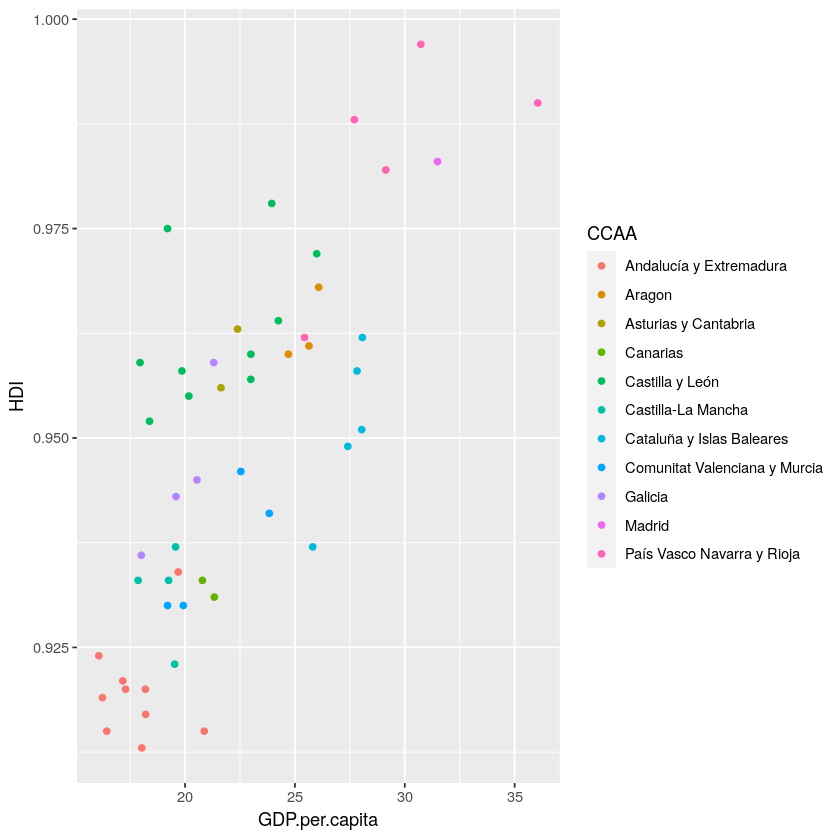

In [45]:
ggplot(filtered_data, aes(x = GDP.per.capita, y = HDI)) + geom_point(aes(color = CCAA))

### Question 12

###### Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 

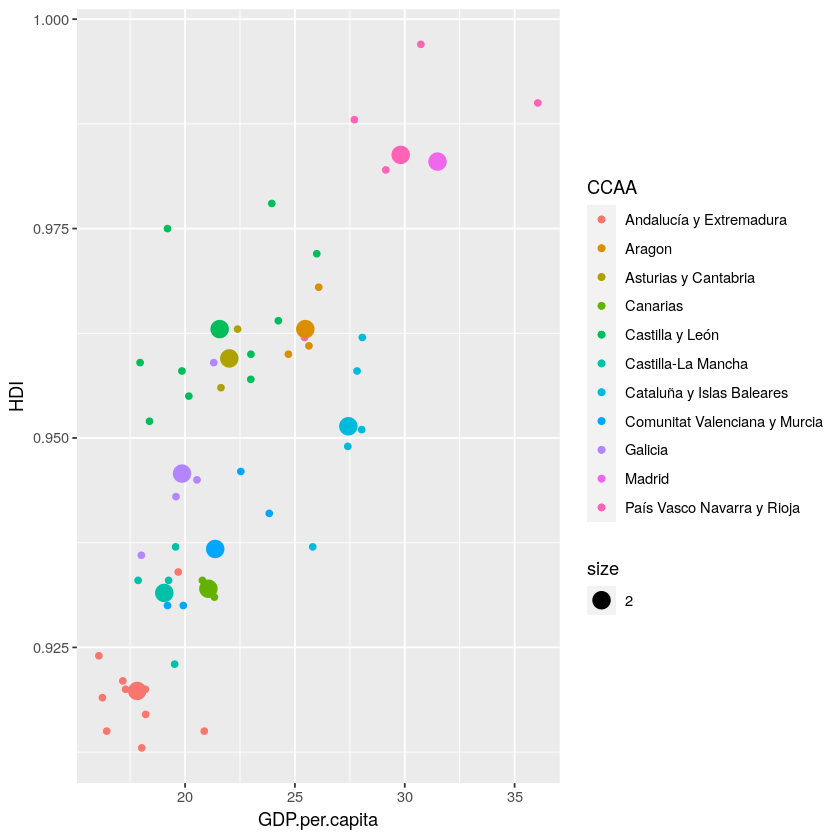

In [68]:
#ggplot(filtered_data) + geom_point(filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point(aes(x = ccaa_df$GDP.mean, y = ccaa_df$HDI.mean))
#?ggplot()
ggplot() +
    geom_point(data = filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + 
    geom_point(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, color = CCAA, size=2))

### Question 13

###### Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.

Warning message:
“Ignoring unknown aesthetics: x”


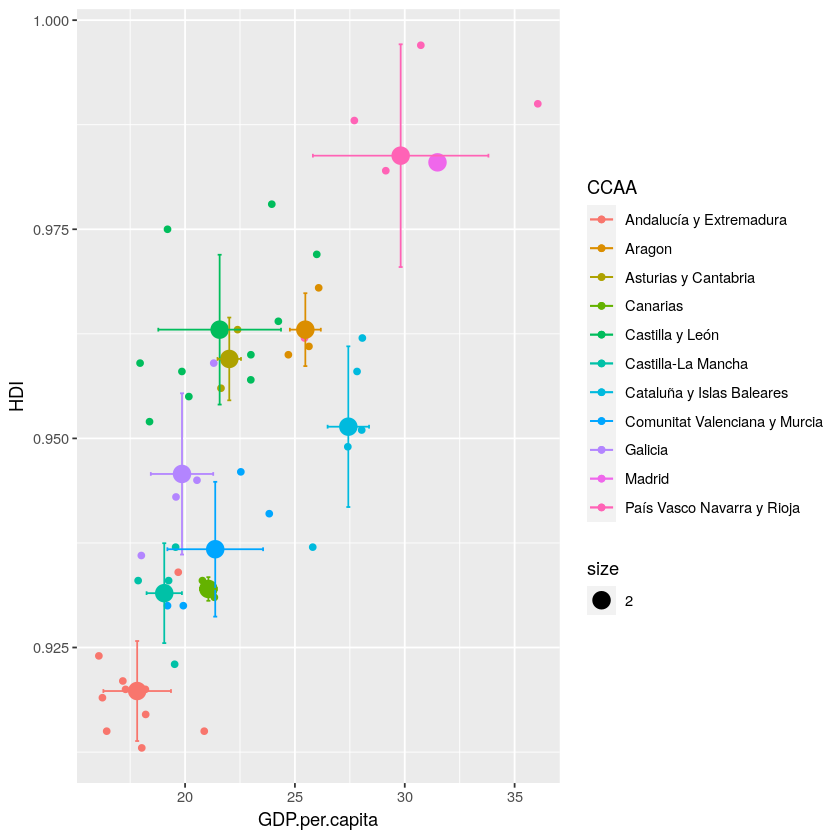

In [76]:
ggplot() +
    geom_point(data = filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + 
    geom_point(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, color = CCAA, size=2)) +
    geom_errorbar(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, ymin = HDI.mean - HDI.stdev, ymax = HDI.mean + HDI.stdev, color = CCAA)) +
    geom_errorbarh(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, xmin = GDP.mean - GDP.stdev, xmax = GDP.mean + GDP.stdev, color = CCAA))

### Question 14

###### Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)

Warning message:
“Ignoring unknown aesthetics: x”


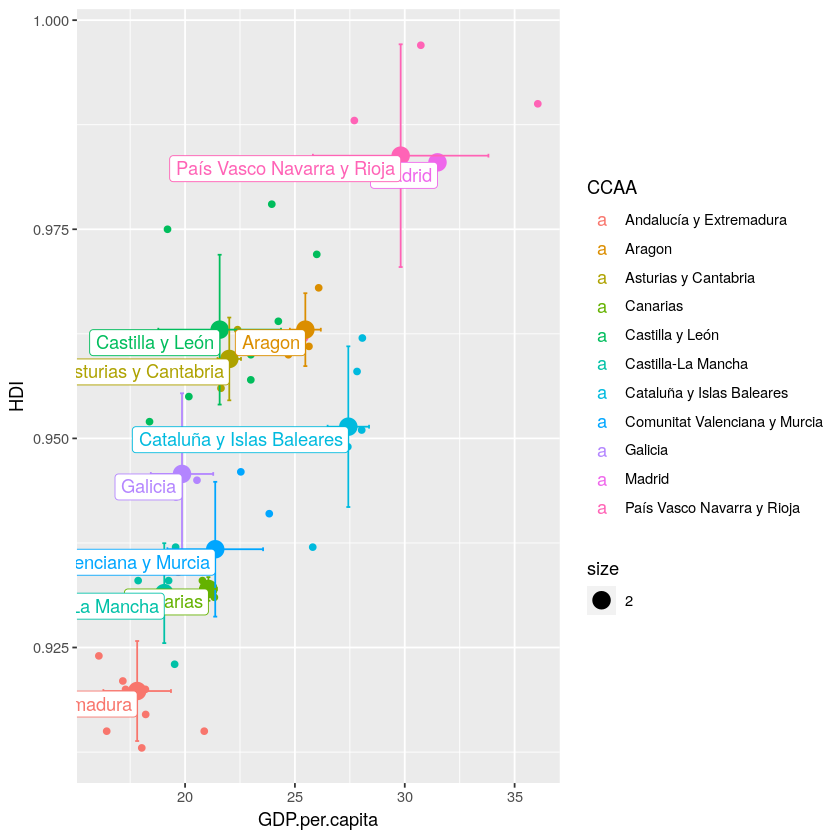

In [88]:
#?geom_label()
ggplot() +
    geom_point(data = filtered_data, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + 
    geom_point(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, color = CCAA, size=2)) +
    geom_errorbar(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, ymin = HDI.mean - HDI.stdev, ymax = HDI.mean + HDI.stdev, color = CCAA)) +
    geom_errorbarh(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, xmin = GDP.mean - GDP.stdev, xmax = GDP.mean + GDP.stdev, color = CCAA)) +
    geom_label(data = ccaa_df, aes(x = GDP.mean, y = HDI.mean, label = CCAA, color = CCAA), hjust=1, vjust=1)

### Question 15

###### (Optional) It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP. Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?

Knowing that GDP is part of the formula of HDI, the points should follow a more defined line to conlcude that increasing _only_ GDP leads to in improvement in HDI. Looking at the chart, in general terms it does, but it is not true in every case. Life Expectancy and Education index also seem to have an important weight in the equation.